Convolutional neural network to Recognise shape

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

print("All the Required Modules have been Imported")
print("The Tensorflow Version we are using is: "+tf.__version__)

All the Required Modules have been Imported
The Tensorflow Version we are using is: 2.0.0


In [2]:
#This is the Version we are using
print(tf.__version__)

2.0.0


In [3]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
print("MNIST Dataset has been splitted in to x_train,y_train,x_test,y_test")

MNIST Dataset has been splitted in to x_train,y_train,x_test,y_test


This is How the Colored Image looks Like


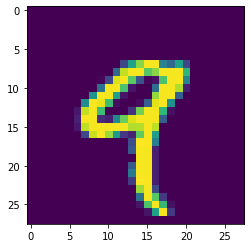

In [4]:
print("This is How the Colored Image looks Like")
plt.imshow(x_train[4])

Binary Image


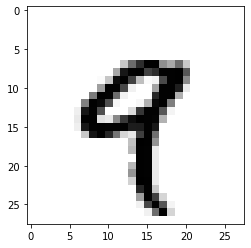

In [5]:
print("Binary Image")
plt.imshow(x_train[4], cmap=plt.cm.binary)

In [6]:
"""Shape of the x_train and its type"""
print("Shape of the x_train "+str(x_train.shape)+" Type is: "+str(type(x_train[2])))

Shape of the x_train (60000, 28, 28) Type is: <class 'numpy.ndarray'>


In [7]:
x_train=x_train.reshape(x_train.shape[0],28,28,1)
x_test=x_test.reshape(x_test.shape[0],28,28,1)
print("reshaped the x_train and x_test")
x_train

reshaped the x_train and x_test


array([[[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]]],


       [[[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        [[0],
         [0],
         [0],
         ...,
         [0],
         [0],
         [0]],

        ...,

        [[0],
         [0],
         [0],
         ...,
         [0],


In [8]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

x_train=x_train/255
x_test=x_test/255

In [9]:
x_train

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [10]:
input_shape=(28,28,1)
"""Build Model using layer Conv2D,MaxPooling2D,Drropout,Dense. I'm not sure if the Flatten is a Layer"""

model=tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D(32,(3,3),activation='relu',
                              input_shape=input_shape,name='input_layer'))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',name='conv_1'))

model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2),name='pool_1'))
model.add(tf.keras.layers.Dropout(0.25,name='dropout_1')) #0.25  rate must be a scalar tensor or a float in the range [0, 1), got 3

model.add(tf.keras.layers.Flatten(name='flate_1'))

model.add(tf.keras.layers.Dense(128,activation='relu',name='dense_1'))
model.add(tf.keras.layers.Dropout(0.5,name='dropout_2')) #0.5  rate must be a scalar tensor or a float in the range [0, 1), got 3

model.add(tf.keras.layers.Dense(10,activation='softmax',name='output_layer'))
print("Model is now Ready to Use")
print("----------------------------------------------------------------------------------------------------------------------")

model.summary()

Model is now Ready to Use
----------------------------------------------------------------------------------------------------------------------
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (Conv2D)         (None, 26, 26, 32)        320       
_________________________________________________________________
conv_1 (Conv2D)              (None, 24, 24, 64)        18496     
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flate_1 (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)   

In [11]:
#Compile the Model
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,optimizer='adam',metrics=['accuracy'])

In [12]:
print("Fitting the Model has been Started")
model.fit(x_train,y_train,batch_size=128,epochs=5,validation_data=(x_test,y_test))  

Fitting the Model has been Started
Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 123s 2ms/sample - loss: 0.2462 - accuracy: 0.9246 - val_loss: 0.0490 - val_accuracy: 0.9839
Epoch 2/5
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.0859 - accuracy: 0.9747 - val_loss: 0.0405 - val_accuracy: 0.9871
Epoch 3/5
60000/60000 [==============================] - 108s 2ms/sample - loss: 0.0650 - accuracy: 0.9804 - val_loss: 0.0310 - val_accuracy: 0.9901
Epoch 4/5
60000/60000 [==============================] - 107s 2ms/sample - loss: 0.0515 - accuracy: 0.9842 - val_loss: 0.0309 - val_accuracy: 0.9902
Epoch 5/5
60000/60000 [==============================] - 108s 2ms/sample - loss: 0.0461 - accuracy: 0.9860 - val_loss: 0.0272 - val_accuracy: 0.9915


In [13]:
print("We will be looking at loss and Accuracy of the Model for predicting MNIST Digits")
score=model.evaluate(x_test,y_test)

print('Test loss',score[0])
print('Test accuracy',score[1])

We will be looking at loss and Accuracy of the Model for predicting MNIST Digits
10000/1 [==============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [14]:
##Summary of the Model's Layer
model.layers[0]._name='conv_0'
print(model.layers[0].name)

model.summary()

conv_0
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_0 (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv_1 (Conv2D)              (None, 24, 24, 64)        18496     
_________________________________________________________________
pool_1 (MaxPooling2D)        (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flate_1 (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)         

In [15]:
#Loss and Accuracy of the Model
score=model.evaluate(x_test,y_test)

print('Test loss',score[0])
print('Test accuracy',score[1])

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [16]:
def visualize_conv_layer(layer_name):
  
  layer_output=model.get_layer(layer_name).output  #get the Output of the Layer

  intermediate_model=tf.keras.models.Model(inputs=model.input,outputs=layer_output) #Intermediate model between Input Layer and Output Layer which we are concerned about

  intermediate_prediction=intermediate_model.predict(x_train[4].reshape(1,28,28,1)) #predicting in the Intermediate Node
  
  row_size=4
  col_size=8
  
  img_index=0

  print(np.shape(intermediate_prediction))
    #---------------We will subplot the Output of the layer which will be the layer_name----------------------------------#
  
  fig,ax=plt.subplots(row_size,col_size,figsize=(10,8)) 

  for row in range(0,row_size):
    for col in range(0,col_size):
      ax[row][col].imshow(intermediate_prediction[0, :, :, img_index], cmap='gray')

      img_index=img_index+1 #Increment the Index number of img_index variable
        
print("Function to Visualize the Output has been Created")

Function to Visualize the Output has been Created


In [17]:
print("These are the weights of a Layer")
print("----------------------------------------------------------------------")
model.layers[0].get_weights()

These are the weights of a Layer
----------------------------------------------------------------------


[array([[[[ 4.29515680e-03, -4.71081622e-02,  8.66431296e-02,
           -1.80039406e-01, -6.23966828e-02, -7.65662268e-03,
            1.79406896e-01,  5.81099689e-02, -1.38044626e-01,
           -1.37378965e-02,  1.64258048e-01, -8.13817605e-02,
            1.20159023e-01, -2.08742291e-01, -2.28642877e-02,
           -2.33480543e-01, -1.47999048e-01, -8.10704604e-02,
            4.67647985e-02,  5.66088147e-02,  1.39229357e-01,
            1.05989520e-02, -1.11217923e-01,  8.47453177e-02,
            5.53968512e-02,  4.08844044e-03,  2.05693021e-01,
           -1.84604190e-02,  7.83945769e-02,  2.31061876e-01,
            3.52915041e-02, -1.17944628e-01]],
 
         [[ 7.91284442e-02, -1.90723121e-01, -1.55457258e-01,
            3.99727225e-02,  1.06792137e-01,  1.00712381e-01,
            8.51281658e-02, -2.20304087e-01, -1.47631004e-01,
            1.89114988e-01, -2.29926277e-02, -2.74055362e-01,
            9.04129893e-02,  1.09744541e-01, -6.05783053e-02,
           -2.6114592

(1, 26, 26, 32)


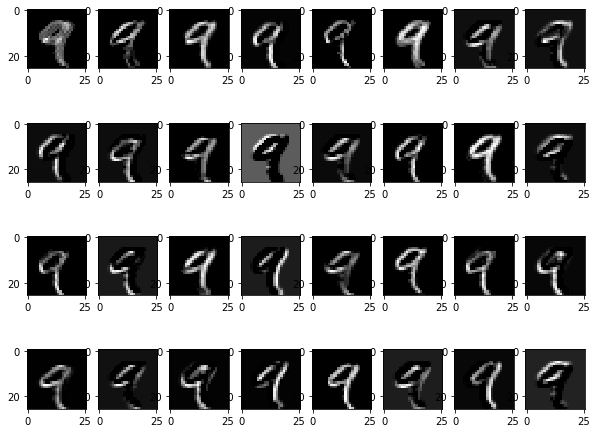

In [18]:
visualize_conv_layer('conv_0')

(1, 24, 24, 64)


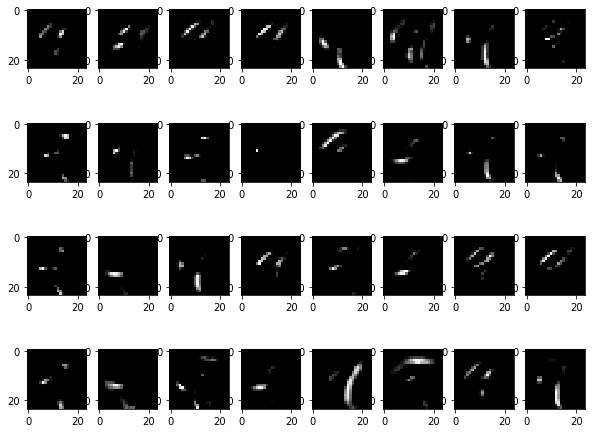

In [19]:
visualize_conv_layer('conv_1')

(1, 12, 12, 64)


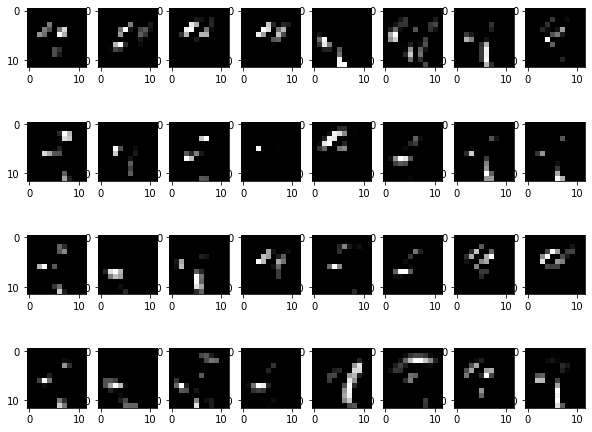

In [20]:
visualize_conv_layer('pool_1')

(1, 12, 12, 64)


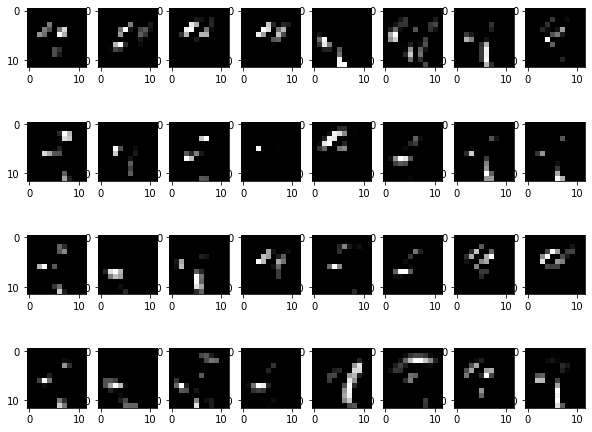

In [21]:
visualize_conv_layer('dropout_1')

These are how the Output of each intermediate layers looks like in the Model